<a href="https://colab.research.google.com/github/VitikaJain25/Eduxlabs-AI-ML/blob/main/V_eict_Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning** - If we have unlabelled Data
* Clustering
* Association Rule Mining

**Clustering Process**

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'x' : [12,24,28,33,18,29,52,45,24,55,51,61,53,69,72,64,49,58],
                   'y' : [36,39,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7]})

df

,x,y
0,12,36
1,24,39
2,28,30
3,33,52
4,18,54
5,29,46
6,52,55
7,45,59
8,24,63
9,55,70


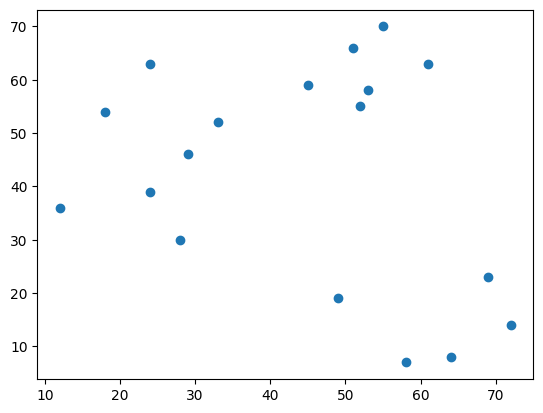

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'])
plt.show()

In [9]:
print(df.x.min(), df.x.max())
print(df.y.min(), df.y.max())

12 72
7 70


In [10]:
# Step 1 : Define Centeroids = 3 Centeroids => will help forming 3 clusters
# Centeroid should have 2 cordinates.

centeroid0 = [np.random.randint(12,72), np.random.randint(7,70)]
centeroid1 = [np.random.randint(12,72), np.random.randint(7,70)]
centeroid2 = [np.random.randint(12,72), np.random.randint(7,70)]

print(centeroid0, centeroid1, centeroid2)

[18, 15] [68, 8] [62, 35]


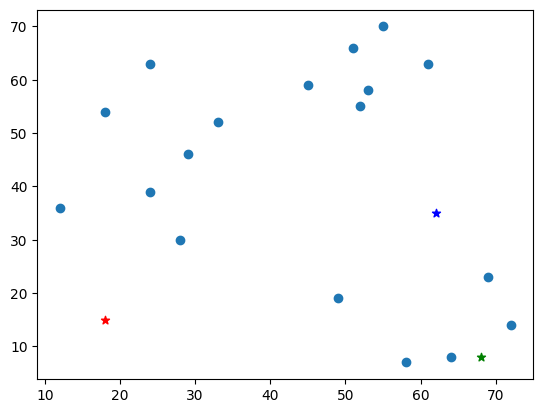

In [11]:
plt.scatter(df['x'], df['y'])
plt.scatter(centeroid0[0], centeroid0[1], marker = '*', c = 'r')
plt.scatter(centeroid1[0], centeroid1[1], marker = '*', c = 'g')
plt.scatter(centeroid2[0], centeroid2[1], marker = '*', c = 'b')
plt.show()

In [30]:
# We calculate the distance from each centroid.
# If it is closed to blue color group, it will be part of blue color group. Same for green and red color group.

# Distance of all x cordinates from Centeroid 0.
df['r'] = ((df['x'] - centeroid0[0])**2 + (df['y'] - centeroid0[1])*0.5)
df['g'] = ((df['x'] - centeroid1[0])**2 + (df['y'] - centeroid1[1])*0.5)
df['b'] = ((df['x'] - centeroid2[0])**2 + (df['y'] - centeroid2[1])*0.5)


In [31]:
df.head()

,x,y,r,g,b,min
0,12,36,139.142857,3431.0,1778.216049,r
1,24,39,-3.357143,2172.5,910.382716,r
2,28,30,8.142857,1812.0,680.104938,r
3,33,52,84.142857,1423.0,453.882716,r
4,18,54,40.142857,2774.0,1316.549383,r


In [32]:
# Minimum value horizontally - that is why axis = 1

df['min'] = df.loc[:, 'r' : 'b'].idxmin(axis = 1)

In [33]:
df.head()

,x,y,r,g,b,min
0,12,36,139.142857,3431.0,1778.216049,r
1,24,39,-3.357143,2172.5,910.382716,r
2,28,30,8.142857,1812.0,680.104938,r
3,33,52,84.142857,1423.0,453.882716,r
4,18,54,40.142857,2774.0,1316.549383,r


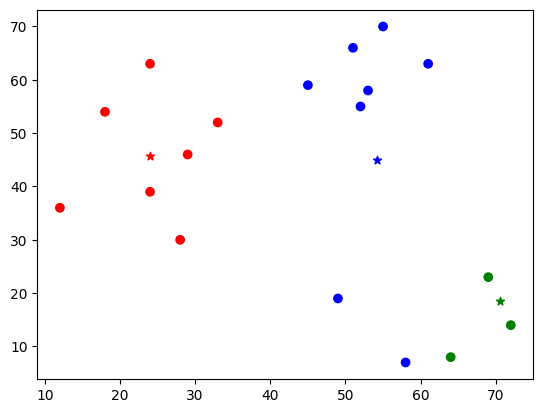

In [34]:
plt.scatter(df['x'], df['y'], c = df['min'])
plt.scatter(centeroid0[0], centeroid0[1], marker = '*', c = 'r')
plt.scatter(centeroid1[0], centeroid1[1], marker = '*', c = 'g')
plt.scatter(centeroid2[0], centeroid2[1], marker = '*', c = 'b')
plt.show()

In [35]:
# Till now we were using a random Centeroid/
# Now we need to update the value of centeroid.
# We need to calculate the average

group_mean = df.groupby('min')[['x', 'y']].mean()
group_mean

,x,y
min,,
b,53.000000,49.625000
g,68.333333,15.000000
r,24.000000,45.714286


In [36]:
group_mean.loc['r']

x    24.000000
y    45.714286
Name: r, dtype: float64

In [37]:
centeroid0 = list(group_mean.loc['r'])
centeroid1 = list(group_mean.loc['g'])
centeroid2 = list(group_mean.loc['b'])

print(centeroid0, centeroid1, centeroid2)

[24.0, 45.714285714285715] [68.33333333333333, 15.0] [53.0, 49.625]


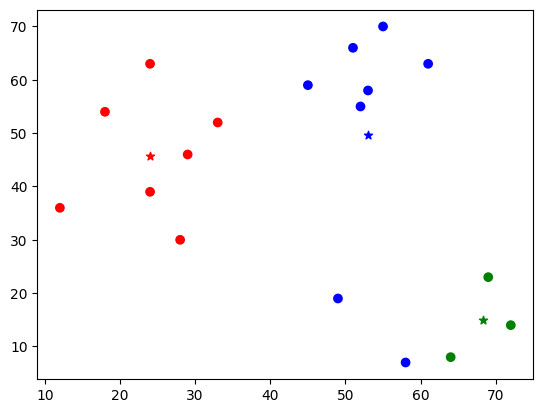

In [38]:
plt.scatter(df['x'], df['y'], c = df['min'])
plt.scatter(centeroid0[0], centeroid0[1], marker = '*', c = 'r')
plt.scatter(centeroid1[0], centeroid1[1], marker = '*', c = 'g')
plt.scatter(centeroid2[0], centeroid2[1], marker = '*', c = 'b')
plt.show()

In [39]:
group_mean = df.groupby('min')[['x', 'y']].mean()
group_mean

,x,y
min,,
b,53.000000,49.625000
g,68.333333,15.000000
r,24.000000,45.714286


In [40]:
centeroid0 = list(group_mean.loc['r'])
centeroid1 = list(group_mean.loc['g'])
centeroid2 = list(group_mean.loc['b'])

print(centeroid0, centeroid1, centeroid2)

[24.0, 45.714285714285715] [68.33333333333333, 15.0] [53.0, 49.625]


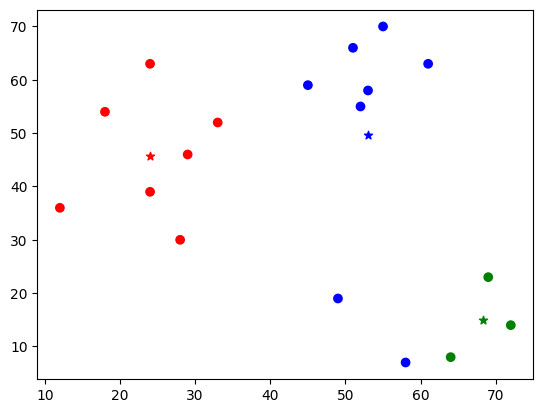

In [41]:
plt.scatter(df['x'], df['y'], c = df['min'])
plt.scatter(centeroid0[0], centeroid0[1], marker = '*', c = 'r')
plt.scatter(centeroid1[0], centeroid1[1], marker = '*', c = 'g')
plt.scatter(centeroid2[0], centeroid2[1], marker = '*', c = 'b')
plt.show()

In [42]:
df.head()

,x,y,r,g,b,min
0,12,36,139.142857,3431.0,1778.216049,r
1,24,39,-3.357143,2172.5,910.382716,r
2,28,30,8.142857,1812.0,680.104938,r
3,33,52,84.142857,1423.0,453.882716,r
4,18,54,40.142857,2774.0,1316.549383,r


In [43]:
df[['x','y','min']]

,x,y,min
0,12,36,r
1,24,39,r
2,28,30,r
3,33,52,r
4,18,54,r
5,29,46,r
6,52,55,b
7,45,59,b
8,24,63,r
9,55,70,b


In [45]:
red_group = df[df['min'] == 'r']
red_group

,x,y,r,g,b,min
0,12,36,139.142857,3431.0,1778.216049,r
1,24,39,-3.357143,2172.5,910.382716,r
2,28,30,8.142857,1812.0,680.104938,r
3,33,52,84.142857,1423.0,453.882716,r
4,18,54,40.142857,2774.0,1316.549383,r
5,29,46,25.142857,1736.0,636.660494,r
8,24,63,8.642857,2184.5,922.382716,r
